<a href="https://colab.research.google.com/github/Mlamalerie/Diabetes-prediction/blob/main/Diabetes_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [292]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [293]:
WORKSPACE_PATH = "/content/gdrive/Shareddrives/ING3 (2022-23) Mlamali/22 • Big Data/Project Evaluation ML"

# Diabetes Prediction

> Diabetes is a disease that occurs when your blood glucose, also called blood sugar, is too high. Blood glucose is your main source of energy and comes from the food you eat. Insulin, a hormone made by the pancreas, helps glucose from food get into your cells to be used for energy. Sometimes your body doesn’t make enough—or any—insulin or doesn’t use insulin well. Glucose then stays in your blood and doesn’t reach your cells.


Can you build a machine learning model to accurately **predict whether or not the patients in the dataset have diabetes or not?**


## Import librairies

In [368]:
import pandas as pd 
import numpy as np

import seaborn as sns # library for visualization
import matplotlib.pyplot as plt # library for visualization
%matplotlib inline

import warnings
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
from plotly.subplots import make_subplots
warnings.filterwarnings("ignore")

## The Dataset

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

The dataset consists of several medical predictor variables and one target variable, Outcome. Predictor variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

### Read
load diabetes.csv

In [295]:
df_diabetes = pd.read_csv(f"{WORKSPACE_PATH}/diabetes.csv")
df_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Infos

In [296]:
df_diabetes.shape

(768, 9)

In [297]:
df_diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Les colonnes incluses dans ce jeu de données sont les suivantes :

1. Pregnancies : Nombre de grossesses
2. Glucose : Taux de glucose plasmatique à 2 heures dans un test de tolerance au glucose
3. BloodPressure : Pression sanguine (mm Hg)
4. SkinThickness : Épaisseur cutanée (mm)
5. Insulin : Taux sérique d'insuline (mu U/ml)
6. BMI : Indice de masse corporelle (poids en kg / (taille en m)^2)
7. DiabetesPedigreeFunction : Fonction de pedigree de diabète
8. Age : Âge (années)
9. Outcome : Résultat du test de diabète (0 = pas de diabète, 1 = diabète)

In [298]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Missing Values

Now let us check for missing values.

In [299]:
df_diabetes.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [300]:
df_diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


On remarque des valeurs nulle (=0), c'est illogique.

However the dataset shows some of the features having minimum value as 0 like insulin,BMI,glucose which is not logical and can be considered missing values

In [301]:
columns_with_missing_vals = []
for column in df_diabetes.columns[:-1]:
    ms_vals = len(df_diabetes.loc[df_diabetes[column]==0])
    print(f"Missing values for {column :>25} : {ms_vals:>3}")
    if ms_vals > 0:
        columns_with_missing_vals.append(column)


Missing values for               Pregnancies : 111
Missing values for                   Glucose :   5
Missing values for             BloodPressure :  35
Missing values for             SkinThickness : 227
Missing values for                   Insulin : 374
Missing values for                       BMI :  11
Missing values for  DiabetesPedigreeFunction :   0
Missing values for                       Age :   0


we will be imputing these missing values with the mean with help of sklearn imputer

In [302]:
from sklearn.impute import SimpleImputer
impute = SimpleImputer(missing_values=0, strategy="mean")
df_diabetes.loc[:,columns_with_missing_vals]= impute.fit_transform(df_diabetes.loc[:,columns_with_missing_vals])
df_diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,4.494673,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,2.975395,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,2.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,4.494673,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


All the zero values have been imputed

## EDA

In statistics, exploratory data analysis (EDA) is an approach of analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods

### Correlation 

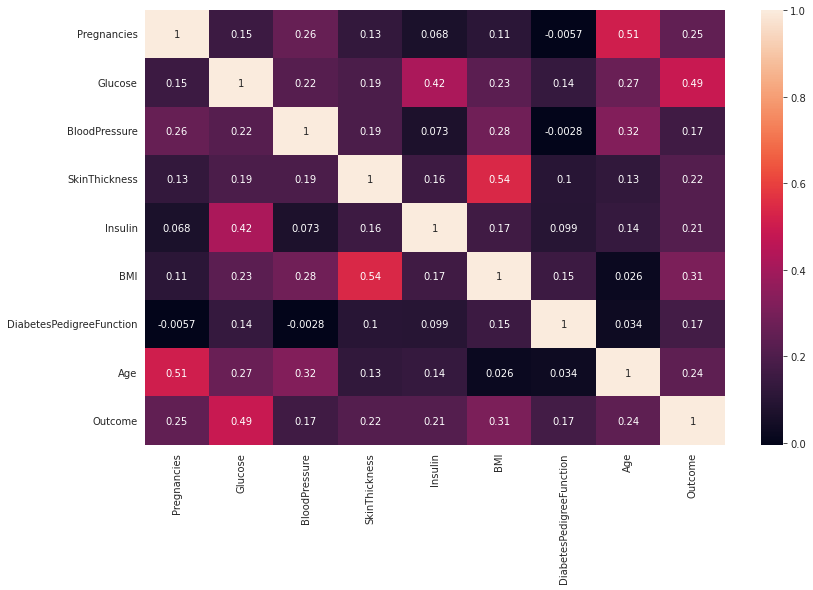

In [303]:
plt.figure(figsize= (13,8))
sns.set_style("darkgrid")
sns.heatmap(df_diabetes.corr(),annot= True)
plt.show()

### Age Distribution

lets see the distribution of age across dataset

In [304]:
ax= px.histogram(df_diabetes,x= "Age",color= "Outcome",title='Age distribution')
ax.show()

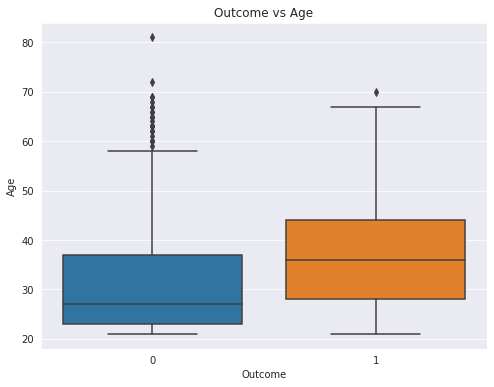

In [305]:
fig, ax=plt.subplots(1,figsize=(8,6))
sns.boxplot(x='Outcome',y='Age', data=df_diabetes)
#ax.set_ylim(0,300)
plt.title("Outcome vs Age")
plt.show()

### Outcome Distribution
lets see the distribution of Outcome(diabetes or not)

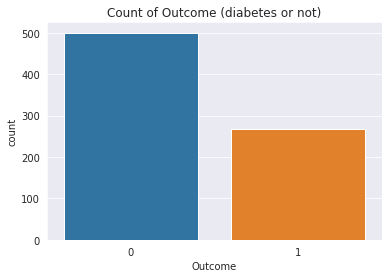

In [306]:
sns.countplot(x='Outcome', data=df_diabetes)
plt.title("Count of Outcome (diabetes or not)")
plt.show()

In [307]:
ax= px.pie(df_diabetes, names= "Outcome",title= "Distribution of Diabetes",hole= 0.65)
ax.show()

The dataset is slightly imbalanced wrt to outcome as 65% of patients have low of diabetes and only 34% patients have high chance

- [ ] https://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset 

1. Enlever des donnée de personnes 0 
2. Créer des nouvelles données (data augmentation) à partir de celle sdéjà existantes (en altérant légérement)

### Glucode + Age

Glucose and age correlation/ distribution across target variable

In [308]:
ax= px.scatter(df_diabetes,x= "Glucose",y= "Age",marginal_x='histogram', marginal_y='histogram',size="Age", size_max=8,color= "Outcome",title="Age and Glucose correlation")
ax.show()

### Blood pressure + Age 
blood pressure and age correlation/ distribution across target variable

In [309]:
ax= px.scatter(df_diabetes,x= "BloodPressure",y= "Age",marginal_x='histogram', marginal_y='histogram',size="Age", size_max=8,color= "Outcome",title="Age and Glucose correlation")
ax.show()

### Insuline + Age

Insulin and age correlation/ distribution across target variable

In [310]:
ax= px.scatter(df_diabetes,x= "Insulin",y= "Age",marginal_x='histogram', marginal_y='histogram',size="Age", size_max=8,color= "Outcome",title="Age and Glucose correlation")
ax.show()

### Insulin  + Glucose + Age

3D scatterplot showing correlation between insulin and glucose across ages and it impacts the target variable

In [311]:
ax = px.scatter_3d(df_diabetes, x="Age", y="Glucose", z="Insulin",template= "plotly_dark",color="Outcome")
ax.show()

In [312]:
ax= px.parallel_coordinates(dt, color="Outcome",template= "plotly_dark")
ax.show()

### BMI + Diabetes pedigree function

Visualizing the BMI and diabetes pedigree function


In [313]:
fig = px.area(df_diabetes, x="Age", y="BMI", color="Outcome")
fig.show()

In [314]:
df_diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [315]:
ax = px.box(df_diabetes.iloc[:,1:-1],template= "plotly_dark")
ax.show()

In [316]:
ax= px.parallel_coordinates(df_diabetes.loc[:,["BMI", 'DiabetesPedigreeFunction',"Outcome"]], color="Outcome")
ax.show()

## Model Building 

In [317]:
#importing essential libraries
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [318]:
models_metrics_results = []

### Preprocessing

In [319]:
df_diabetes.var()

Pregnancies                    8.852974
Glucose                      926.346983
BloodPressure                146.321591
SkinThickness                 77.280660
Insulin                     7228.588766
BMI                           47.267706
DiabetesPedigreeFunction       0.109779
Age                          138.303046
Outcome                        0.227483
dtype: float64

In [320]:
df_diabetes.mean()

Pregnancies                   4.494673
Glucose                     121.686763
BloodPressure                72.405184
SkinThickness                29.153420
Insulin                     155.548223
BMI                          32.457464
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                       0.348958
dtype: float64

The features have high variance and hence need to be normalized

In [321]:
from sklearn.preprocessing import MinMaxScaler
# Instancier un objet MinMaxScaler
scaler = MinMaxScaler()
cols_to_normalize = df_diabetes.columns[:-1]
# Normaliser les données en utilisant le fit_transform de MinMaxScaler
df_diabetes[cols_to_normalize] = scaler.fit_transform(df_diabetes[cols_to_normalize])

In [322]:
df_diabetes.var()

Pregnancies                 0.034582
Glucose                     0.038558
BloodPressure               0.015235
SkinThickness               0.009131
Insulin                     0.010443
BMI                         0.019767
DiabetesPedigreeFunction    0.020014
Age                         0.038418
Outcome                     0.227483
dtype: float64

In [323]:
df_diabetes.mean()

Pregnancies                 0.218417
Glucose                     0.501205
BloodPressure               0.493930
SkinThickness               0.240798
Insulin                     0.170130
BMI                         0.291564
DiabetesPedigreeFunction    0.168179
Age                         0.204015
Outcome                     0.348958
dtype: float64

### Train Test Split

In [324]:
label= df_diabetes["Outcome"]
train= df_diabetes.drop("Outcome",axis= 1)
x_train,x_test,y_train,y_test= train_test_split(train,label,test_size= 0.2,random_state= 5)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(614, 8)
(614,)
(154, 8)
(154,)


### 🤖 K-nn 

In [325]:
k_to_test = list(np.arange(1,50))
k_to_test[:10]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [326]:
scores= []
for k in k_to_test:
    knn= KNeighborsClassifier(n_neighbors= k)
    knn.fit(x_train,y_train)
    scores.append(accuracy_score(y_test,knn.predict(x_test)))

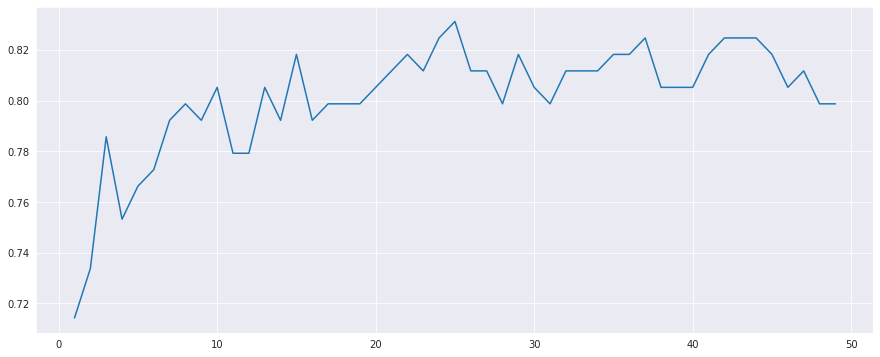

In [327]:
plt.figure(figsize= (15,6))
sns.lineplot(k_to_test,scores)
plt.show()

In [328]:
best_k = np.argmax(scores) + 1

In [329]:
knn= KNeighborsClassifier(n_neighbors= best_k)
knn.fit(x_train,y_train)
knnpred = knn.predict(x_test)
print(f"accuracy score: ",accuracy_score(y_test,knnpred))

accuracy score:  0.8311688311688312


In [330]:
def classification_report_and_interpretation(y_test,y_pred):
    report = classification_report(y_test,y_pred)
    print(report)
    dict_report = classification_report(y_test,y_pred,output_dict=True)
    df_classification_report = pd.DataFrame(dict_report).transpose()
    print(df_classification_report)

    print("---")
    accuracy = df_classification_report["f1-score"]["accuracy"]
    precision_1 = df_classification_report["precision"][1]
    print(f"Precision: Of all the people that the model predicted had diabetes, only {precision_1:.0%} actually had it.")
    recall_1 = df_classification_report["recall"][1]
    print(f"Recall   : Of all the people with diabetes, the model predicted this outcome correctly for only {recall_1:.0%} of them.")
    f1_score_1 = df_classification_report["f1-score"][1]
    if f1_score_1 < 0.6:
        print("F1-Score : /!\ Since this value is not very close to 1, this tells us that the model does a poor job of predicting whether individuals have diabetes or not.")
    print("---")
    return accuracy, precision_1, recall_1,f1_score_1

accuracy_, _ , recall_, _ = classification_report_and_interpretation(y_test,knnpred)

              precision    recall  f1-score   support

           0       0.86      0.89      0.87       100
           1       0.78      0.72      0.75        54

    accuracy                           0.83       154
   macro avg       0.82      0.81      0.81       154
weighted avg       0.83      0.83      0.83       154

              precision    recall  f1-score     support
0              0.855769  0.890000  0.872549  100.000000
1              0.780000  0.722222  0.750000   54.000000
accuracy       0.831169  0.831169  0.831169    0.831169
macro avg      0.817885  0.806111  0.811275  154.000000
weighted avg   0.829201  0.831169  0.829577  154.000000
---
Precision: Of all the people that the model predicted had diabetes, only 78% actually had it.
Recall   : Of all the people with diabetes, the model predicted this outcome correctly for only 72% of them.
---


In [331]:
models_metrics_results.append({"model" : "KNN", "accuracy" : accuracy_, "recall" : recall_ })

### 🤖 Logistic Regression

In [332]:
lr= LogisticRegression()
lr.fit(x_train,y_train)
lrpred= lr.predict(x_test)
print(f"accuracy score: ",accuracy_score(y_test,lrpred))

accuracy score:  0.8116883116883117


In [333]:
accuracy_, _ , recall_, _ = classification_report_and_interpretation(y_test,lrpred)

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       100
           1       0.79      0.63      0.70        54

    accuracy                           0.81       154
   macro avg       0.81      0.77      0.78       154
weighted avg       0.81      0.81      0.81       154

              precision    recall  f1-score     support
0              0.819820  0.910000  0.862559  100.000000
1              0.790698  0.629630  0.701031   54.000000
accuracy       0.811688  0.811688  0.811688    0.811688
macro avg      0.805259  0.769815  0.781795  154.000000
weighted avg   0.809608  0.811688  0.805919  154.000000
---
Precision: Of all the people that the model predicted had diabetes, only 79% actually had it.
Recall   : Of all the people with diabetes, the model predicted this outcome correctly for only 63% of them.
---


In [334]:
models_metrics_results.append({"model" : "Logistic Regression", "accuracy" : accuracy_, "recall" : recall_ })

### 🤖 Random Forest

In [335]:
rf= RandomForestClassifier()
rf.fit(x_train,y_train)
rfpred= rf.predict(x_test)
accuracy_score(y_test,rfpred)

0.7857142857142857

In [336]:
classification_report_and_interpretation(y_test,rfpred)

              precision    recall  f1-score   support

           0       0.83      0.84      0.84       100
           1       0.70      0.69      0.69        54

    accuracy                           0.79       154
   macro avg       0.76      0.76      0.76       154
weighted avg       0.78      0.79      0.79       154

              precision    recall  f1-score     support
0              0.831683  0.840000  0.835821  100.000000
1              0.698113  0.685185  0.691589   54.000000
accuracy       0.785714  0.785714  0.785714    0.785714
macro avg      0.764898  0.762593  0.763705  154.000000
weighted avg   0.784847  0.785714  0.785246  154.000000
---
Precision: Of all the people that the model predicted had diabetes, only 70% actually had it.
Recall   : Of all the people with diabetes, the model predicted this outcome correctly for only 69% of them.
---


(0.7857142857142857,
 0.6981132075471698,
 0.6851851851851852,
 0.6915887850467289)

#### hyperparams tuning...

In [337]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [338]:
#hyperparameter tuning
params={
    'max_depth': [80, 90, 100],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200]
}

L'argument `scoring` dans `GridSearchCV` définit la métrique utilisée pour évaluer les modèles et sélectionner les meilleurs hyperparamètres. 

In [339]:
grid_search = GridSearchCV(estimator = rf, param_grid = params,cv = 5, scoring='recall')
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [80, 90, 100], 'max_features': [2, 3],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200]},
             scoring='recall')

In [340]:
grid_search.best_params_

{'max_depth': 90,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'n_estimators': 100}

In [341]:
grid_search.best_score_

0.6027685492801772

L'attribut `.best_score_` de l'objet GridSearchCV est la meilleure moyenne de la validation croisée pour le modèle avec les meilleurs hyperparamètres trouvés. Cette moyenne est basée sur le score choisi lors de la définition de GridSearchCV en utilisant l'argument `scoring`.

In [342]:
# Construire un modèle RandomForest en utilisant les meilleurs hyperparamètres trouvés
best_rf = RandomForestClassifier(**grid_search.best_params_)

# Entraîner ce nouveau modèle sur toutes les données d'entraînement (pas seulement les données utilisées pour GridSearchCV)
best_rf.fit(x_train,y_train)
rfpred= best_rf.predict(x_test)
accuracy_score(y_test,rfpred)

0.7922077922077922

In [343]:
accuracy_, _ , recall_, _ = classification_report_and_interpretation(y_test,rfpred)

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       100
           1       0.71      0.69      0.70        54

    accuracy                           0.79       154
   macro avg       0.77      0.77      0.77       154
weighted avg       0.79      0.79      0.79       154

              precision    recall  f1-score     support
0              0.833333  0.850000  0.841584  100.000000
1              0.711538  0.685185  0.698113   54.000000
accuracy       0.792208  0.792208  0.792208    0.792208
macro avg      0.772436  0.767593  0.769849  154.000000
weighted avg   0.790626  0.792208  0.791276  154.000000
---
Precision: Of all the people that the model predicted had diabetes, only 71% actually had it.
Recall   : Of all the people with diabetes, the model predicted this outcome correctly for only 69% of them.
---


In [344]:
models_metrics_results.append({"model" : "Random Forest", "accuracy" : accuracy_, "recall" : recall_ })

### 🤖 AdaBoost

In [345]:
ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
adpred= ad.predict(x_test)
accuracy_score(y_test,adpred)

0.8181818181818182

In [346]:
classification_report_and_interpretation(y_test,adpred)

              precision    recall  f1-score   support

           0       0.85      0.88      0.86       100
           1       0.76      0.70      0.73        54

    accuracy                           0.82       154
   macro avg       0.80      0.79      0.80       154
weighted avg       0.82      0.82      0.82       154

              precision    recall  f1-score     support
0              0.846154  0.880000  0.862745  100.000000
1              0.760000  0.703704  0.730769   54.000000
accuracy       0.818182  0.818182  0.818182    0.818182
macro avg      0.803077  0.791852  0.796757  154.000000
weighted avg   0.815944  0.818182  0.816468  154.000000
---
Precision: Of all the people that the model predicted had diabetes, only 76% actually had it.
Recall   : Of all the people with diabetes, the model predicted this outcome correctly for only 70% of them.
---


(0.8181818181818182, 0.76, 0.7037037037037037, 0.7307692307692308)

#### hyperparams tuning...

In [347]:
ad.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': None}

In [348]:
#hyperparameter tuning
params={
   "learning_rate":[0.2,0.1,0.5,0.8,1.0],
   "n_estimators": [50,100,150,200]
}

In [349]:
grid_search = GridSearchCV(estimator = ad, param_grid = params,cv = 5, scoring='recall')
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.2, 0.1, 0.5, 0.8, 1.0],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='recall')

In [350]:
grid_search.best_score_

0.5562569213732005

In [351]:
grid_search.best_params_

{'learning_rate': 1.0, 'n_estimators': 50}

In [352]:
# Construire un modèle RandomForest en utilisant les meilleurs hyperparamètres trouvés
best_ad = AdaBoostClassifier(**grid_search.best_params_)

# Entraîner ce nouveau modèle sur toutes les données d'entraînement (pas seulement les données utilisées pour GridSearchCV)
best_ad.fit(x_train,y_train)
adpred= best_ad.predict(x_test)
accuracy_score(y_test,adpred)

0.8181818181818182

In [353]:
accuracy_, _ , recall_, _ = classification_report_and_interpretation(y_test,adpred)

              precision    recall  f1-score   support

           0       0.85      0.88      0.86       100
           1       0.76      0.70      0.73        54

    accuracy                           0.82       154
   macro avg       0.80      0.79      0.80       154
weighted avg       0.82      0.82      0.82       154

              precision    recall  f1-score     support
0              0.846154  0.880000  0.862745  100.000000
1              0.760000  0.703704  0.730769   54.000000
accuracy       0.818182  0.818182  0.818182    0.818182
macro avg      0.803077  0.791852  0.796757  154.000000
weighted avg   0.815944  0.818182  0.816468  154.000000
---
Precision: Of all the people that the model predicted had diabetes, only 76% actually had it.
Recall   : Of all the people with diabetes, the model predicted this outcome correctly for only 70% of them.
---


In [354]:
models_metrics_results.append({"model" : "AdaBoost", "accuracy" : accuracy_, "recall" : recall_ })

### 🤖 GradientBoosting

In [355]:
gb= GradientBoostingClassifier()
gb.fit(x_train,y_train)
gbpred= gb.predict(x_test)
accuracy_score(y_test,gbpred)

0.8181818181818182

In [356]:
accuracy_, _ , recall_, _ = classification_report_and_interpretation(y_test,gbpred)

              precision    recall  f1-score   support

           0       0.83      0.90      0.87       100
           1       0.78      0.67      0.72        54

    accuracy                           0.82       154
   macro avg       0.81      0.78      0.79       154
weighted avg       0.82      0.82      0.81       154

              precision    recall  f1-score     support
0              0.833333  0.900000  0.865385  100.000000
1              0.782609  0.666667  0.720000   54.000000
accuracy       0.818182  0.818182  0.818182    0.818182
macro avg      0.807971  0.783333  0.792692  154.000000
weighted avg   0.815547  0.818182  0.814406  154.000000
---
Precision: Of all the people that the model predicted had diabetes, only 78% actually had it.
Recall   : Of all the people with diabetes, the model predicted this outcome correctly for only 67% of them.
---


In [357]:
models_metrics_results.append({"model" : "GradientBoosting", "accuracy" : accuracy_, "recall" : recall_ })


### Compare models

In [364]:
dx = pd.DataFrame(models_metrics_results)
dx.sort_values(by="recall",inplace=True, ascending=False)# sort by recall
dx

,model,accuracy,recall
0,KNN,0.831169,0.722222
3,AdaBoost,0.818182,0.703704
2,Random Forest,0.792208,0.685185
4,GradientBoosting,0.818182,0.666667
1,Logistic Regression,0.811688,0.629630


In [414]:
model_colors = px.colors.qualitative.Bold[0:len(dx)]
model_colors

['rgb(127, 60, 141)',
 'rgb(17, 165, 121)',
 'rgb(57, 105, 172)',
 'rgb(242, 183, 1)',
 'rgb(231, 63, 116)']

In [415]:
fig = make_subplots(rows=1, cols=2)

fig.add_trace(go.Bar(x=dx["model"], y=dx["recall"], marker=dict(color=model_colors), name="Recall"), 1, 1)

fig.add_trace(go.Bar(x=dx["model"], y=dx["accuracy"], marker=dict(color=model_colors), name="Acurracy"), 1, 2)

fig.update_layout(coloraxis=dict(colorscale='Bluered_r'),
    title="Titre du graphique",
    xaxis=dict(title="Modèles",showgrid=False),
    yaxis=dict(title="Valeur",showgrid=False),
    xaxis2=dict(title="Modèles",showgrid=False),
    yaxis2=dict(title="Valeur",showgrid=False),
    template="ggplot2",
    showlegend=False)
fig.show()

In [418]:
fig = go.Figure(go.Scatter(x=dx["recall"], y=dx["accuracy"], mode="markers",text=dx["model"],
    marker=dict(
        size=35,
        color=model_colors
    )))

fig.update_layout(
    title="Models performance",
    xaxis=dict(title="Recall", showgrid=False),
    yaxis=dict(title="Accuracy", showgrid=False),
    template="ggplot2"
)
fig.show()

# TODO

- sur le training afficher la vrai valeur et la prédiction pour voir les biais, voir ce qu'il arrive à bien classifier, esayer de comprendre pk ça il arrive bien a class, donne des pitestes

- The scores and models can be further improved using hyperparameter tuning with different parameters



## Data Augmentation ?